# **Import library**

In [1]:
pip install tensorflow_decision_forests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 33.5 MB/s eta 0:00:00


In [2]:
!pip install miceforest --no-cache-dir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 61.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 199.7 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import miceforest as mf
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from sklearn.ensemble import BaggingRegressor
import tensorflow_decision_forests as tfdf

# **Data pre-processing**

In [4]:
# Membaca dan mengimport data csv
hp = pd.read_csv("train.csv")
hp.shape
hp.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Membuang kolom Id
hp = hp.drop("Id", axis=1)
hp.shape

(1460, 80)

In [6]:
# Mendefinisikan variabel-variabel numerik dan kategorik

# Kolom-kolom kategorik
kolom_kategorik = ["MSSubClass", "MSZoning", "Street", "Alley", "LotShape", "LandContour", "Utilities", "LotConfig",
                   "LandSlope", "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "OverallQual",
                   "OverallCond", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual",
                   "ExterCond", "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2",
                   "Heating", "HeatingQC", "CentralAir", "Electrical", "KitchenQual", "Functional", "FireplaceQu",
                   "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PavedDrive", "PoolQC", "Fence", "MiscFeature",
                   "SaleType", "SaleCondition"]

# Kolom-kolom numerik
kolom_numerik = []
for col in hp:
  if col not in kolom_kategorik:
    kolom_numerik.append(col)

In [7]:
print(kolom_numerik)
print("Banyaknya variabel numerik adalah ", len(kolom_numerik))

['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
Banyaknya variabel numerik adalah  34


In [8]:
print(kolom_kategorik)
print("Banyaknya variabel kategorik adalah ", len(kolom_kategorik))

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Banyaknya variabel kategorik adalah  46


In [9]:
# Mengubah semua variabel kategorik ke dalam bentuk "category"
for col in kolom_kategorik:
    hp[col] = hp[col].astype("category")

# Mendefinisikan kategori-kategori untuk setiap variabel kategorik
kat_semua_var = [[20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 150, 160, 180, 190], ['A', 'C (all)', 'FV', 'I', 'RH', 'RL', 'RP', 'RM'], ['Grvl', 'Pave'], ['Grvl', 'Pave'], ['IR1', 'IR2', 'IR3', 'Reg'], ['Bnk', 'HLS', 'Low', 'Lvl'], ['AllPub', 'NoSewr', 'NoSeWa', 'ELO'], ['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside'],
                 ['Gtl', 'Mod', 'Sev'], ['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr','Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel','NAmes', 'NoRidge', 'NPkVill', 'NridgHt', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker'],
                 ['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe', 'RRNn'], ['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe', 'RRNn'], ['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'], ['1.5Fin', '1.5Unf', '1Story', '2.5Fin', '2.5Unf', '2Story', 'SFoyer', 'SLvl'],
                 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ['Flat', 'Gable', 'Gambrel', 'Hip', 'Mansard', 'Shed'], ['ClyTile', 'CompShg', 'Membran', 'Metal', 'Roll', 'Tar&Grv', 'WdShake', 'WdShngl'], ['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 'HdBoard', 'ImStucc', 'MetalSd', 'Other', 'Plywood', 'Precast', 'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'WdShing'],
                 ['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 'HdBoard', 'ImStucc', 'MetalSd', 'Other', 'Plywood', 'Precast', 'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'WdShing'], ['BrkCmn', 'BrkFace', 'CBlock', 'None', 'Stone'], ['Ex', 'Fa', 'Gd', 'TA', 'Po'], ['Ex', 'Fa', 'Gd', 'Po', 'TA'],
                 ['BrkTil', 'CBlock', 'PConc', 'Slab', 'Stone', 'Wood'], ['Ex', 'Fa', 'Gd', 'Po', 'TA'], ['Ex', 'Fa', 'Gd', 'Po', 'TA'], ['Av', 'Gd', 'Mn', 'No'], ['ALQ', 'BLQ', 'GLQ', 'LwQ', 'Rec', 'Unf'], ['ALQ', 'BLQ', 'GLQ', 'LwQ', 'Rec', 'Unf'], ['Floor', 'GasA', 'GasW', 'Grav', 'OthW', 'Wall'],
                 ['Ex', 'Fa', 'Gd', 'Po', 'TA'], ['N', 'Y'], ['FuseA', 'FuseF', 'FuseP', 'Mix', 'SBrkr'], ['Ex', 'Fa', 'Gd', 'TA', 'Po'], ['Maj1', 'Maj2', 'Min1', 'Min2', 'Mod', 'Sev', 'Typ', 'Sal'], ['Ex', 'Fa', 'Gd', 'Po', 'TA'], ['2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd'], ['Fin', 'RFn', 'Unf'], ['Ex', 'Fa', 'Gd', 'Po', 'TA'],
                 ['Ex', 'Fa', 'Gd', 'Po', 'TA'], ['N', 'P', 'Y'], ['Ex', 'Fa', 'Gd', 'Ta'], ['GdPrv', 'GdWo', 'MnPrv', 'MnWw'], ['Gar2', 'Othr', 'Shed', 'TenC', 'Elev'], ['COD', 'CWD', 'Con', 'ConLD', 'ConLI', 'ConLw', 'New', 'Oth', 'WD', 'VWD'], ['Abnorml', 'AdjLand', 'Alloca', 'Family', 'Normal', 'Partial']]

# Menyesuaikan kategori pada setiap variabel kategorik
for i in range(len(kolom_kategorik)):
  for level in kat_semua_var[i]:
    if level not in hp[kolom_kategorik[i]].cat.categories:
      hp[kolom_kategorik[i]] = hp[kolom_kategorik[i]].cat.add_categories(level)

# Menghitung jumlah data pada setiap kolomnya yang memiliki NA
def count_col_na(dataframe):
    col_na = dataframe.isnull().sum()
    all_col_na = []

    for i in range(len(col_na)):
        temp = []
        if col_na[i] != 0:
            temp.extend([i, hp.columns[i], col_na[i]])
            all_col_na.append(temp)

    a = all_col_na # kolom-kolom yang memiliki NA
    b = len(all_col_na) # banyaknya kolom dengan nilai NA
    return a,b

list_col_na, sum_col_na = count_col_na(hp)
print(list_col_na)
print(sum_col_na) # terdapat 19 kolom yang memiliki NA

[[2, 'LotFrontage', 259], [5, 'Alley', 1369], [24, 'MasVnrType', 8], [25, 'MasVnrArea', 8], [29, 'BsmtQual', 37], [30, 'BsmtCond', 37], [31, 'BsmtExposure', 38], [32, 'BsmtFinType1', 37], [34, 'BsmtFinType2', 38], [41, 'Electrical', 1], [56, 'FireplaceQu', 690], [57, 'GarageType', 81], [58, 'GarageYrBlt', 81], [59, 'GarageFinish', 81], [62, 'GarageQual', 81], [63, 'GarageCond', 81], [71, 'PoolQC', 1453], [72, 'Fence', 1179], [73, 'MiscFeature', 1406]]
19


In [10]:
# 14 dari 19 kolom memiliki nilai NA sebagai salah satu dari kategorinya, sehingga NA akan diubah sebagai "category"
na_as_category = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu",
                  "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for col in na_as_category:
    hp[col] = hp[col].cat.add_categories("NA").fillna("NA")

list_col_na2, sum_col_na2 = count_col_na(hp)
print(list_col_na2)
print(sum_col_na2) # terdapat 5 kolom tersisa dengan nilai NA

[[2, 'LotFrontage', 259], [24, 'MasVnrType', 8], [25, 'MasVnrArea', 8], [41, 'Electrical', 1], [58, 'GarageYrBlt', 81]]
5


In [11]:
# dari list_col_na terlihat bahwa banyaknya NA pada "GarageYrBlt" sama dengan "GarageType", "GarageFinish", dan "GarageQual"
# artinya kita dapat cukup yakin bahwa observasi dengan nilai NA pada "GarageYrBlt" tidak memiliki garasi

# mengubah "GarageYrBlt" menjadi variabel kategorik
hp["GarageYrBlt"] = hp["GarageYrBlt"].astype("category")
hp["GarageYrBlt"] = hp["GarageYrBlt"].cat.add_categories("NA").fillna("NA")
kolom_kategorik.append("GarageYrBlt")

In [12]:
list_col_na3, sum_col_na3 = count_col_na(hp)
print(list_col_na3)
print(sum_col_na3) # artinya hanya ada 4 kolom yang benar2 memiliki nilai kosong NA

[[2, 'LotFrontage', 259], [24, 'MasVnrType', 8], [25, 'MasVnrArea', 8], [41, 'Electrical', 1]]
4


In [13]:
# menghitung jumlah baris yang memiliki NA
sum_row_na = hp.shape[0] - hp.dropna().shape[0]
percentage = sum_row_na/len(hp) * 100
print("Persentase observasi dengan nilai NA adalah {}%".format(percentage)) # terdapat 18,22% observasi yang memiliki NA (cukup banyak sehingga tidak baik untuk langsung dihapus)

Persentase observasi dengan nilai NA adalah 18.21917808219178%


In [14]:
# Proses Imputation menggunakan Multiple Iteration Chained Equation (MICE) dengan model LightGBM

# Melakukan One hot encoding
hp_encoded = pd.get_dummies(hp, columns = kolom_kategorik, prefix = kolom_kategorik, drop_first = False)

# Membuat kernel
kds = mf.ImputationKernel(
  hp_encoded,
  save_all_iterations=True,
  random_state=100
)

# Jalankan algoritma MICE Light GBM untuk 10 kali iterasi
kds.mice(10)

# Dataset lengkap
hp_imputed = kds.complete_data()

# Memeriksa apakah seluruh data sudah terisi atau belum
list_col_na4, sum_col_na4 = count_col_na(hp_imputed)
print(list_col_na4)
print(sum_col_na4) # semua data observasi sudah terisi

[]
0


In [15]:
# Proses mengubah kembali bentuk one hot encode ke bentuk semula
col_category = hp.select_dtypes("category").columns

reverse_onehot = [] # list untuk mengelompokkan nama-nama kolom dari suatu variabel, cth: ['Street_Grvl', 'Street_Pave']

for col_name in col_category:
    temp = []
    temp = [col for col in hp_imputed.columns if col_name + "_" in col]
    reverse_onehot.append(temp)

# # Menghilangkan elemen duplikat (Garage)
# del reverse_onehot[29][6:11]

for i in range(len(reverse_onehot)):
    subset_data = hp_imputed[reverse_onehot[i]]
    hp_imputed[col_category[i]] = (subset_data.iloc[:,:] == 1).idxmax(1) # membuat kolom dengan nama semula dan datanya diisi dengan kolom bernilai 1
    hp_imputed.drop(reverse_onehot[i], axis=1, inplace=True) # membuang kolom2 one hot encode

for col in kolom_kategorik:
    hp_imputed[col] = hp_imputed[col].astype("category")
    hp_imputed[col] = hp_imputed[col].str.replace(col+"_", "")  # menghilangkan nama variabel pada data

In [16]:
# Menyimpan data lengkap sebagai variabel data_house_price
data_house_price = hp_imputed
data_house_price

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,2003.0,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,1976.0,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,2001.0,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,1998.0,Unf,TA,TA,Y,NA,NA,NA,WD,Abnorml
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,2000.0,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,1999,2000,0.0,0,0,953,953,953,...,1999.0,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
1456,85.0,13175,1978,1988,119.0,790,163,589,1542,2073,...,1978.0,Unf,TA,TA,Y,NA,MnPrv,NA,WD,Normal
1457,66.0,9042,1941,2006,0.0,275,0,877,1152,1188,...,1941.0,RFn,TA,TA,Y,NA,GdPrv,Shed,WD,Normal
1458,68.0,9717,1950,1996,0.0,49,1029,0,1078,1078,...,1950.0,Unf,TA,TA,Y,NA,NA,NA,WD,Normal


# **Explanatory Data Analysis**

In [17]:
# Melihat statistik dasar dari variabel SalePrice
data_house_price["SalePrice"].describe()
# SalePrice memiliki nilai rata2 180.921,196 dan standar deviasi 79.442,503

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

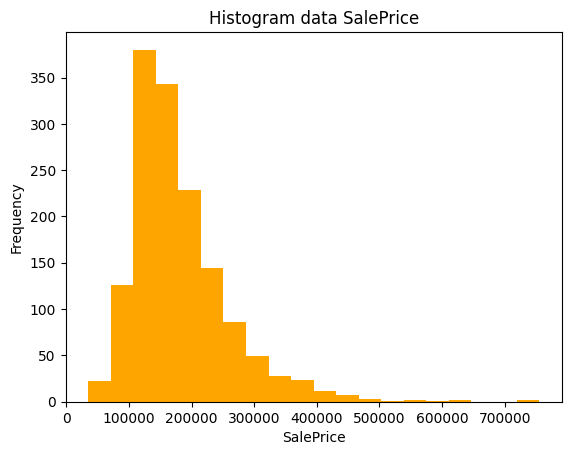

In [18]:
# Melihat distribusi dari data SalePrice
n, bins, patches = plt.hist(data_house_price["SalePrice"], bins=20, color="orange")
plt.title("Histogram data SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()

In [19]:
n

array([ 22., 126., 380., 343., 229., 144.,  86.,  49.,  28.,  23.,  12.,
         7.,   3.,   1.,   2.,   1.,   2.,   0.,   0.,   2.])

In [20]:
# Melihat statistik dasar dari variabel GarageCars
data_house_price["GarageCars"].describe()

count    1460.000000
mean        1.767123
std         0.747315
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64

In [21]:
# Melihat statistik dasar dari variabel GrLivArea
data_house_price["GrLivArea"].describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

In [22]:
# Mengetahui modus dari variabel ExterQual
modus_exter_qual = data_house_price["ExterQual"].mode()
print("Modus dari kolom ExterQual:", modus_exter_qual)

Modus dari kolom ExterQual: 0    TA
Name: ExterQual, dtype: object


In [23]:
# Mengetahui modus dari variabel KitchenQual
modus_kitchen_qual = data_house_price["KitchenQual"].mode()
print("Modus dari kolom KitchenQual:", modus_kitchen_qual)

Modus dari kolom KitchenQual: 0    TA
Name: KitchenQual, dtype: object


In [24]:
# Mengetahui modus dari variabel ExterQual
modus_overall_qual = data_house_price["OverallQual"].mode()
print("Modus dari kolom OverallQual:", modus_overall_qual)

Modus dari kolom OverallQual: 0    5
Name: OverallQual, dtype: object


In [25]:
# Mencari variabel numerik yang signifikan pengaruhnya terhadap SalePrice
# Matriks korelasi antara variabel numerik
korelasi_numerik = data_house_price.corr()
# Korelasi dengan variabel 'SalePrice'
korelasi_saleprice = korelasi_numerik['SalePrice']
# Menyortir nilai korelasi dari yang tertinggi sampai terendah
korelasi_saleprice_sorted = korelasi_saleprice.sort_values(ascending=False)
print("Korelasi antara variabel numerik dengan SalePrice (sorted):")
print(korelasi_saleprice_sorted)

Korelasi antara variabel numerik dengan SalePrice (sorted):
SalePrice        1.000000
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.481204
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.343260
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


<ipython-input-25-f98602351515>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  korelasi_numerik = data_house_price.corr()


In [26]:
# Melakukan uji ANOVA untuk setiap kolom kategorik
# Menyimpan kolom yang p-value lebih dari 0.05
kolom_p_value_lebih_dari_005 = []
for kolom in kolom_kategorik:
    kategori_unik = data_house_price[kolom].unique()
    grup_data = [data_house_price["SalePrice"][data_house_price[kolom] == kategori] for kategori in kategori_unik]
    # Melakukan uji ANOVA
    hasil_anova, p_value = f_oneway(*grup_data)
    # Menyimpan kolom yang p-value lebih dari 0.05
    if p_value > 0.05:
        kolom_p_value_lebih_dari_005.append(kolom)
    # Menampilkan hasil uji untuk setiap kolom kategorik
    print(f"Uji ANOVA untuk {kolom}:")
    print(f"  - Statistik Uji: {hasil_anova}")
    print(f"  - Nilai p: {p_value}")
    print("\n")
# Menampilkan variabel kategorik dengan p-value lebih dari 0.05
print("Variabel kategorik dengan p-value lebih dari 0.05:")
print(kolom_p_value_lebih_dari_005)

Uji ANOVA untuk MSSubClass:
  - Statistik Uji: 33.73207641062383
  - Nilai p: 8.66216626609302e-79


Uji ANOVA untuk MSZoning:
  - Statistik Uji: 43.84028167245718
  - Nilai p: 8.817633866272648e-35


Uji ANOVA untuk Street:
  - Statistik Uji: 2.4592895583691994
  - Nilai p: 0.11704860406782483


Uji ANOVA untuk Alley:
  - Statistik Uji: 15.176613889987992
  - Nilai p: 2.9963796805460783e-07


Uji ANOVA untuk LotShape:
  - Statistik Uji: 40.13285166226295
  - Nilai p: 6.447523852011766e-25


Uji ANOVA untuk LandContour:
  - Statistik Uji: 12.850188333283924
  - Nilai p: 2.7422167521379096e-08


Uji ANOVA untuk Utilities:
  - Statistik Uji: 0.29880407484898486
  - Nilai p: 0.5847167739689381


Uji ANOVA untuk LotConfig:
  - Statistik Uji: 7.809954123467792
  - Nilai p: 3.163167473604189e-06


Uji ANOVA untuk LandSlope:
  - Statistik Uji: 1.9588170374149438
  - Nilai p: 0.1413963584114019


Uji ANOVA untuk Neighborhood:
  - Statistik Uji: 71.78486512058272
  - Nilai p: 1.558600282771154e

In [27]:
# Buat dataframe baru yang isinya variabel-variabel penting saja
# Daftar kolom yang ingin disertakan dalam variabel baru
kolom_variabel_baru = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF',
                       'FullBath', 'TotRmsAbvGrd','YearBuilt','YearRemodAdd',
                       'MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
                       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
                       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
                       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
                       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
                       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
                       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition','SalePrice']
# Membuat DataFrame baru hanya dengan kolom-kolom yang dipilih
data_baru = data_house_price[kolom_variabel_baru].copy()
# Menampilkan DataFrame baru
data_baru

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,7,1710,2,548,856,856,2,8,2003,2003,...,RFn,TA,TA,Y,NA,NA,NA,WD,Normal,208500
1,6,1262,2,460,1262,1262,2,6,1976,1976,...,RFn,TA,TA,Y,NA,NA,NA,WD,Normal,181500
2,7,1786,2,608,920,920,2,6,2001,2002,...,RFn,TA,TA,Y,NA,NA,NA,WD,Normal,223500
3,7,1717,3,642,756,961,1,7,1915,1970,...,Unf,TA,TA,Y,NA,NA,NA,WD,Abnorml,140000
4,8,2198,3,836,1145,1145,2,9,2000,2000,...,RFn,TA,TA,Y,NA,NA,NA,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,460,953,953,2,7,1999,2000,...,RFn,TA,TA,Y,NA,NA,NA,WD,Normal,175000
1456,6,2073,2,500,1542,2073,2,7,1978,1988,...,Unf,TA,TA,Y,NA,MnPrv,NA,WD,Normal,210000
1457,7,2340,1,252,1152,1188,2,9,1941,2006,...,RFn,TA,TA,Y,NA,GdPrv,Shed,WD,Normal,266500
1458,5,1078,1,240,1078,1078,1,5,1950,1996,...,Unf,TA,TA,Y,NA,NA,NA,WD,Normal,142125


# **Pembangunan Model**

Random Forest

In [28]:
# Memisahkan variabel bebas dan variabel terikat
X = data_baru.drop('SalePrice', axis=1)  # Variabel bebas
y = data_baru['SalePrice']  # Variabel terikat

In [29]:
# One-hot encoding untuk kolom-kolom kategorik
X = pd.get_dummies(X, drop_first=True)

In [30]:
# Membagi data menjadi 80% data latih dan 20% data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Membuat model Random Forest
model_rf = RandomForestRegressor(random_state=42)

In [32]:
# Menentukan grid parameter yang akan diuji
param_grid = {
    'n_estimators': [50, 100, 150],  # Jumlah pohon dalam ensemble
    'max_depth': [2, 4, 6, 8],  # Kedalaman maksimum setiap pohon
    'min_samples_split': [2, 5, 10],  # Jumlah sampel minimum yang diperlukan untuk membagi node
    'min_samples_leaf': [1, 2, 4]  # Jumlah sampel minimum yang diperlukan di setiap leaf node
}

In [33]:
# Membuat objek GridSearchCV
grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

In [34]:
# Melakukan pencarian parameter terbaik
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [35]:
# Menampilkan parameter terbaik
best_params = grid_search_rf.best_params_
print(f"Parameter Terbaik: {best_params}")

Parameter Terbaik: {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}


In [36]:
# Memprediksi nilai SalePrice pada data uji dengan model yang telah di-tune
y_pred_tuned = grid_search_rf.best_estimator_.predict(X_test)

In [37]:
# Mengukur performa model yang telah di-tune menggunakan RMSE
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mse_tuned)
print(f"RMSE setelah tuning: {rmse_tuned}")

RMSE setelah tuning: 30062.36764697267


In [38]:
# Mengukur R-squared setelah tuning
r_squared_tuned = r2_score(y_test, y_pred_tuned)
print(f"R-squared setelah tuning: {r_squared_tuned}")

R-squared setelah tuning: 0.8821763346003543


In [39]:
# Test data pre-processing
test_data = pd.read_csv("test.csv")

# Membuang kolom Id
test_data = test_data.drop("Id", axis=1)

# Mengubah semua variabel kategorik ke dalam bentuk "category"
for col in kolom_kategorik:
    test_data[col] = test_data[col].astype("category")

# Menambahkan kategori pada variabel kategorik untuk test data agar sesuai dengan train data
for col in kolom_kategorik:
  for category in hp[col].cat.categories:
    if category not in test_data[col].cat.categories:
      test_data[col] = test_data[col].cat.add_categories(category)

FileNotFoundError: [Errno 2] No such file or directory: 'test.csv'

In [ ]:
test_data["MSSubClass"].dtypes

In [ ]:
hp["MSSubClass"].dtypes

In [ ]:
hp["Condition2"].cat.categories

In [ ]:
# Memilih kolom-kolom yang akan digunakan pada test_data
kolom_variabel_baru_t = kolom_variabel_baru[0:len(kolom_variabel_baru)-1] # menghilangkan SalePrice

test_baru = test_data[kolom_variabel_baru_t].copy()
test_baru

In [ ]:
list_col_na_test, sum_col_na_test = count_col_na(test_baru)
print(list_col_na_test)
print(sum_col_na_test)

In [ ]:
# 14 dari 25 kolom memiliki nilai NA sebagai salah satu dari kategorinya, sehingga NA akan diubah sebagai "category"
for col in na_as_category:
    test_baru[col] = test_baru[col].cat.add_categories("NA").fillna("NA")

list_col_na2_test, sum_col_na2_test = count_col_na(test_baru)
print(list_col_na2_test)
print(sum_col_na2_test) # terdapat 11 kolom tersisa dengan nilai NA

In [ ]:
# Proses Imputation menggunakan Multiple Iteration Chained Equation (MICE) dengan model LightGBM

# Melakukan One hot encoding
kolom_kategorik_t = []
for col in kolom_variabel_baru_t:
  if col in kolom_kategorik:
    kolom_kategorik_t.append(col)

test_encoded = pd.get_dummies(test_baru, columns = kolom_kategorik_t, prefix = kolom_kategorik_t, drop_first = False)

# Membuat kernel
kds_2 = mf.ImputationKernel(
  test_encoded,
  save_all_iterations=True,
  random_state=100
)

# Jalankan algoritma MICE Light GBM untuk 10 kali iterasi
kds_2.mice(10)

# Dataset lengkap
test_imputed = kds_2.complete_data()

# Memeriksa apakah seluruh data sudah terisi atau belum
imputed_na, sum_imputed_na = count_col_na(test_imputed)
print(imputed_na)
print(sum_imputed_na) # semua data observasi sudah terisi

In [ ]:
# Proses mengubah kembali bentuk one hot encode ke bentuk semula

reverse_onehot_t = [] # list untuk mengelompokkan nama-nama kolom dari suatu variabel, cth: ['Alley_Grvl', 'Alley_Pave', 'Alley_NA']

for col_name in kolom_kategorik_t:
    temp = []
    temp = [col for col in test_imputed.columns if col_name+"_" in col]
    reverse_onehot_t.append(temp)

for i in range(len(reverse_onehot_t)):
    subset_data = test_imputed[reverse_onehot_t[i]]
    test_imputed[kolom_kategorik_t[i]] = (subset_data.iloc[:,:] == 1).idxmax(1) # membuat kolom dengan nama semula dan datanya diisi dengan kolom bernilai 1
    test_imputed.drop(reverse_onehot_t[i], axis=1, inplace=True) # membuang kolom2 one hot encode

for col in kolom_kategorik_t:
    test_imputed[col] = test_imputed[col].astype("category")
    test_imputed[col] = test_imputed[col].str.replace(col+"_", "")  # menghilangkan nama variabel pada data

In [ ]:
# One-hot encoding untuk kolom-kolom kategorik
test_imputed_oh = pd.get_dummies(test_imputed, drop_first=True)

pred_test_data = grid_search_rf.best_estimator_.predict(test_imputed_oh)

XGBoost

In [ ]:
# Memisahkan variabel bebas dan variabel terikat
X = data_baru.drop('SalePrice', axis=1)  # Variabel bebas
y = data_baru['SalePrice']  # Variabel terikat

In [ ]:
# One-hot encoding untuk kolom-kolom kategorik
X = pd.get_dummies(X, drop_first=True)

In [ ]:
# Membagi data menjadi 80% data latih dan 20% data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Membuat model XGBoost Regressor
model_xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

In [ ]:
# Menentukan grid parameter yang akan diuji
param_grid = {
    'n_estimators': [50, 100, 150],  # Jumlah pohon dalam ensemble
    'learning_rate': [0.01, 0.1, 0.2],  # Tingkat pembelajaran
    'max_depth': [3, 5, 7],  # Kedalaman maksimum setiap pohon
    'min_child_weight': [1, 3, 5]  # Minimum jumlah sampel yang diperlukan di setiap daun
}

In [ ]:
# Membuat objek GridSearchCV
grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

In [ ]:
# Melakukan pencarian parameter terbaik
grid_search.fit(X_train, y_train)

In [ ]:
# Menampilkan parameter terbaik
best_params = grid_search.best_params_
print(f"Parameter Terbaik: {best_params}")

In [ ]:
# Memprediksi nilai SalePrice pada data uji dengan model yang telah di-tune
y_pred_tuned = grid_search.best_estimator_.predict(X_test)

In [ ]:
# Mengukur performa model yang telah di-tune menggunakan RMSE
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mse_tuned)
print(f"RMSE setelah tuning: {rmse_tuned}")

In [ ]:
# Mengukur R-squared setelah tuning
r_squared_tuned = r2_score(y_test, y_pred_tuned)
print(f"R-squared setelah tuning: {r_squared_tuned}")

In [ ]:
best_params

Neural Network

In [ ]:
# Memisahkan variabel bebas dan variabel terikat
X = data_baru.drop('SalePrice', axis=1)  # Variabel bebas
y = data_baru['SalePrice']  # Variabel terikat

In [ ]:
# One-hot encoding untuk kolom-kolom kategorik
X = pd.get_dummies(X, drop_first=True)

In [ ]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standarisasi data menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Membuat model Neural Network
model_nn = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Output layer tanpa aktivasi untuk tugas regresi
])

In [ ]:
# Menentukan optimizer, loss function, dan metrik evaluasi
model_nn.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

In [ ]:
# Melatih model dengan data pelatihan
model_nn.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

In [ ]:
# Evaluasi performa model menggunakan data pengujian
y_pred = model_nn.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

In [ ]:
# Mengukur R-squared
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")

Elastic Net

In [ ]:
# Memisahkan variabel bebas dan variabel terikat
X = data_baru.drop('SalePrice', axis=1)  # Variabel bebas
y = data_baru['SalePrice']  # Variabel terikat

In [ ]:
# One-hot encoding untuk kolom-kolom kategorik
X = pd.get_dummies(X, drop_first=True)

In [ ]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standarisasi data menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Membuat model Elastic Net
model_elastic_net = ElasticNet()

In [ ]:
# Menentukan grid parameter yang akan diuji
param_grid = {
    'alpha': [0.01, 0.1, 1.0],  # Parameter untuk kontrol kebijakan regularisasi total
    'l1_ratio': [0.1, 0.5, 0.9]  # Rasio campuran L1 dan L2 regularisasi
}

In [ ]:
# Membuat objek GridSearchCV
grid_search = GridSearchCV(estimator=model_elastic_net, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5)

In [ ]:
# Melakukan pencarian parameter terbaik
grid_search.fit(X_train_scaled, y_train)

In [ ]:
# Menampilkan parameter terbaik
best_params = grid_search.best_params_
print(f"Parameter Terbaik: {best_params}")

In [ ]:
# Memprediksi nilai SalePrice pada data uji dengan model yang telah di-tune
y_pred_tuned = grid_search.best_estimator_.predict(X_test_scaled)

In [ ]:
# Mengukur performa model yang telah di-tune menggunakan RMSE
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mse_tuned)
print(f"RMSE setelah tuning: {rmse_tuned}")

In [ ]:
# Mengukur R-squared setelah tuning
r_squared_tuned = r2_score(y_test, y_pred_tuned)
print(f"R-squared setelah tuning: {r_squared_tuned}")

SVM

In [ ]:
# Memisahkan variabel bebas dan variabel terikat
X = data_baru.drop('SalePrice', axis=1)  # Variabel bebas
y = data_baru['SalePrice']  # Variabel terikat

In [ ]:
# One-hot encoding untuk kolom-kolom kategorik
X = pd.get_dummies(X, drop_first=True)

In [ ]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standarisasi data menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Membuat model Support Vector Machine Regressor
model_svm = SVR(kernel='linear', C=1.0)

In [ ]:
# Melatih model dengan data pelatihan
model_svm.fit(X_train_scaled, y_train)

In [ ]:
# Memprediksi nilai SalePrice pada data uji
y_pred = model_svm.predict(X_test_scaled)

In [ ]:
# Mengukur performa model menggunakan Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

In [ ]:
# Mengukur R-squared
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")

LGBM

In [ ]:
# Memisahkan variabel bebas dan variabel terikat
X = data_baru.drop('SalePrice', axis=1)  # Variabel bebas
y = data_baru['SalePrice']  # Variabel terikat

In [ ]:
# Label Encoding untuk kolom-kolom kategorikal
label_encoder = LabelEncoder()
for column in X.select_dtypes(include=['object']).columns:
    X[column] = X[column].astype(str)  # Mengubah semua nilai menjadi string
    X[column] = label_encoder.fit_transform(X[column])

In [ ]:
# Membagi data menjadi data latih & data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Membuat dataset LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [ ]:
# Membuat parameter LightGBM
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

In [ ]:
# Menentukan grid parameter yang akan diuji
param_grid = {
    'num_leaves': [15, 31, 50],
    'learning_rate': [0.01, 0.05, 0.1],
    'feature_fraction': [0.8, 0.9, 1.0],
    'bagging_fraction': [0.8, 0.9, 1.0]
}

In [ ]:
# Membuat objek GridSearchCV
grid_search = GridSearchCV(estimator=lgb.LGBMRegressor(**params), param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

In [ ]:
# Melakukan pencarian parameter terbaik
grid_search.fit(X_train, y_train)

In [ ]:
# Menampilkan parameter terbaik
best_params = grid_search.best_params_
print(f"Parameter Terbaik: {best_params}")

In [ ]:
# Membuat model LightGBM dengan parameter terbaik
best_params.update(params)
bst_tuned = lgb.train(best_params, train_data, num_boost_round=1000, valid_sets=[train_data, test_data])

In [ ]:
# Memprediksi nilai SalePrice pada set pengujian dengan model yang telah di-tune
y_pred_tuned = bst_tuned.predict(X_test, num_iteration=bst_tuned.best_iteration)

In [ ]:
# Mengukur performa model yang telah di-tune menggunakan RMSE
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mse_tuned)
print(f"RMSE setelah tuning: {rmse_tuned}")

In [ ]:
# Mengukur R-squared setelah tuning
r_squared_tuned = r2_score(y_test, y_pred_tuned)
print(f"R-squared setelah tuning: {r_squared_tuned}")

Decision Tree with Bagging

In [ ]:
# Memisahkan variabel bebas dan variabel terikat
X = data_baru.drop('SalePrice', axis=1)
y = data_baru['SalePrice']

In [ ]:
# One-hot encoding untuk kolom-kolom kategorik
X = pd.get_dummies(X, drop_first=True)

In [ ]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Membuat model DecisionTreeRegressor sebagai model dasar
base_model = DecisionTreeRegressor(random_state=42)

In [ ]:
# Membuat model BaggingRegressor
bagging_model = BaggingRegressor(base_model, n_estimators=5, random_state=42)

In [ ]:
# Menentukan daftar parameter yang akan diuji
param_grid = {
    'n_estimators': [5, 10, 15],  # Jumlah model dalam ensemble
    'max_samples': [0.5, 0.7, 1.0],  # Proporsi sampel untuk setiap model
    'base_estimator__max_depth': [None, 5, 10]  # Kedalaman maksimum setiap model dasar
}

In [ ]:
# Membuat objek GridSearchCV untuk tuning parameter
grid_search = GridSearchCV(bagging_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [ ]:
# Melatih model dengan tuning parameter
grid_search.fit(X_train, y_train)

In [ ]:
# Menampilkan parameter terbaik
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

In [ ]:
# Membuat model dengan parameter terbaik
best_bagging_model = grid_search.best_estimator_

In [ ]:
# Memprediksi nilai SalePrice pada data uji
y_pred = best_bagging_model.predict(X_test)

In [ ]:
# Mengukur performa model menggunakan Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

In [ ]:
# Mengukur R-squared
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")

# Variable Importance

In [ ]:
# Akan dibuat plot variable importance untuk 2 model terbaik berdasarkan RMSE dan R^2, yaitu model XGBoost dan LightGBM

# Model XGBoost
model_xgb = XGBRegressor(learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=150)
model_xgb.fit(X_train, y_train)

# Membuat plot feature importance XGBoost
from xgboost import plot_importance
plot_importance(model_xgb, importance_type="gain", max_num_features=10,
                title="Variable Importances pada Model XGBoost", ylabel="Variabel Bebas",
                xlabel="Gain (kontribusi variabel terhadap model)")
# Gain importance mengukur peningkatan akurasi model dengan menggunakan suatu variabel tertentu dalam splitting
# Ukuran ini juga mengukur kualitas yang diberikan oleh splits

In [ ]:
# Membuat plot feature importance LightGBM
lgb.plot_importance(bst_tuned, importance_type="gain", max_num_features=10,
                title="Variable Importances pada Model LightGBM", ylabel="Variabel Bebas",
                xlabel="Gain (kontribusi variabel terhadap model)")
# Gain importance mengukur peningkatan akurasi model dengan menggunakan suatu variabel tertentu dalam splitting
# Ukuran ini juga mengukur kualitas yang diberikan oleh splits